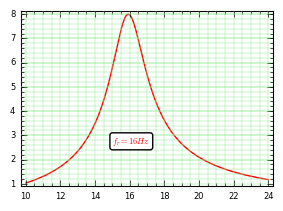

In [25]:
var('r f l c');radians = pi/180.0;degrees = 180.0/pi
def argd(x):
    return N(arg(x) * degrees)
def plt(q,a,b,typ = abs,col = 'blue'):
     return plot(lambda x: float(typ(q(x))),
                 (x,a,b),rgbcolor=col)
omega = 2*pi*f    
zs(r,l,c,f) = r + (i*omega*l) - i/(omega*c)
a = 10;b = 24;r = 1/8;l = 1/100;c = 1/100;
fr=1/(2*pi*(sqrt(l*c)))
lbl = text("$f_r = %.00f Hz$" % (fr),(15,3),
           rgbcolor="red",horizontal_alignment="left",
           fontsize=6,vertical_alignment="top",
           bounding_box={'boxstyle':'round', 'fc':'w'})
q(f) = zs(r,l,c,f);p1 = plt(1/q,a,b,abs,"red")
zs(r,l,c,f) = r + (i*omega*l) - i/(omega*c)
show(p1+lbl,figsize=(3),fontsize=6,frame=True,
     gridlines="minor",gridlinesstyle=dict(color="lightgreen",
                                           linestyle="-",
                         linewidth="0.35"))  

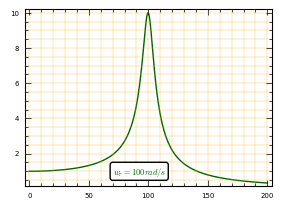

In [2]:
var("omega")
R=0.1;L=1/100;C=1/100;w=1/(sqrt(L*C));
p=plot(abs(1/(1+i*omega*R*C-omega*omega*L*C)),
       [omega,0,2*w],color="darkgreen")
f=w;r=R;c=C;l=L
lbl = text("$w_r = %.0f rad/s$" % (f),(70,1),
           rgbcolor="darkgreen",
           horizontal_alignment="left",
           fontsize=6,
           bounding_box={'boxstyle':'round', 'fc':'w'})
show(p+lbl,figsize=3,frame=True,axes=False,
     gridlines="minor",fontsize=5,
     gridlinesstyle=dict(color="orange",
                         linestyle="-",
                         linewidth="0.20"))

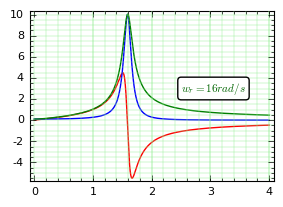

In [30]:
var('f') 
class RLC(object):    
    def __init__(yi, z): 
        yi.z = z 
    def __add__(yi, ya): 
        return RLC(yi.z + ya.z) 
    def __mul__(yi, ya): 
        return RLC(1/(1/yi.z + 1/ya.z))
class R(RLC): 
    def __init__(yi, r): 
        RLC.__init__(yi, r) 
class L(RLC): 
    def __init__(yi, l): 
        RLC.__init__(yi, i*2*pi*f*l) 
class C(RLC): 
    def __init__(yi, c): 
        RLC.__init__(yi, -i/(2*pi*f*c)) 
def xl(rlc): 
    return lambda f: imag(rlc.z(f=n(f))) 
def xc(rlc): 
    return lambda f: real(rlc.z(f=n(f))) 
def xm(rlc): 
    return lambda f: n(abs((rlc.z(f=n(f)))))
o = (R(1/10) + L(1/10))*C(1/10) 
Xl = xl(o) 
Xc = xc(o) 
X = xm(o) 
a=plot(Xl, 0, 4,color="red")
b=plot(Xc, 0, 4,color="blue") 
c=plot(X, 0, 4, color="green")
lbl = text("$w_r = %.0f rad/s$" % (fr),(2.5,3),
           rgbcolor="darkgreen",horizontal_alignment="left",
           fontsize=8,
           bounding_box={'boxstyle':'round', 'fc':'w'})
show(a+b+c+lbl,axes=False,figsize=3,
     frame=True,fontsize=8,gridlines="minor",
gridlinesstyle=dict(color="lightgreen",linestyle="-",
                    linewidth="0.30"))